In [10]:
import numpy as np
from scipy.stats import norm
import scipy.optimize as opt
import yfinance as yf
import pandas as pd
import datetime
import time
from arch import arch_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')

In [13]:
stocks = '^GSPC'
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2021, 8, 1)
s_p500 = yf.download(stocks, start=start, end = end, interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [15]:
ret = 100 * (s_p500.pct_change()[1:]['Adj Close']) 
realized_vol = ret.rolling(5).std()

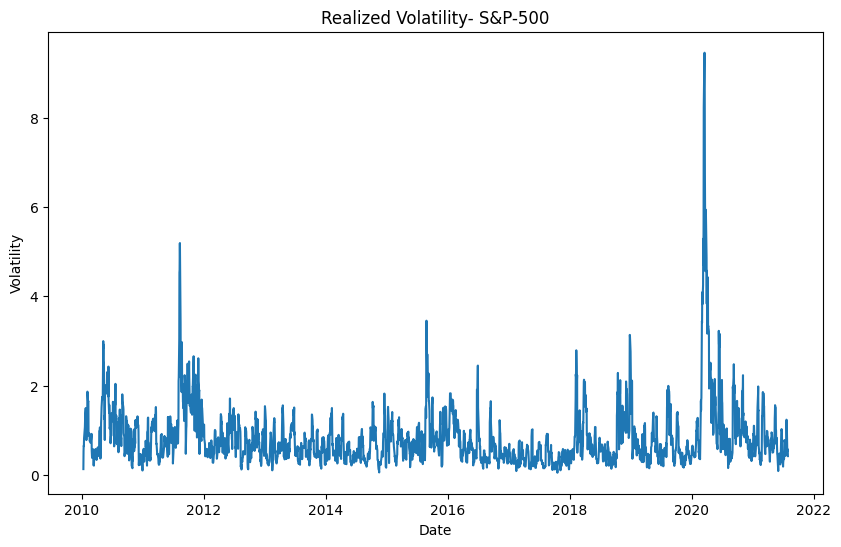

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(realized_vol.index,realized_vol)
plt.title('Realized Volatility- S&P-500')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.show()

In [17]:
n = 252
split_date = ret.iloc[-n:].index 


In [31]:
split_date[0]

Timestamp('2020-07-31 00:00:00')

In [27]:
bic_garch = []

for p in range(1, 5):
    for q in range(1, 5):
        garch = arch_model(ret, mean='zero',vol='GARCH', p=p, o=0, q=q).fit(disp='off')
        bic_garch.append(garch.bic)
        if garch.bic == np.min(bic_garch):
            best_param = p, q
garch = arch_model(ret, mean='zero', vol='GARCH',
                   p=best_param[0], o=0, q=best_param[1]) \
    .fit(disp='off',last_obs=split_date[0])
print(garch.summary())

forecast = garch.forecast(start=split_date[0])
forecast_garch = forecast


                       Zero Mean - GARCH Model Results                        
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3319.19
Distribution:                  Normal   AIC:                           6644.38
Method:            Maximum Likelihood   BIC:                           6662.04
                                        No. Observations:                 2661
Date:                Fri, Feb 23 2024   Df Residuals:                     2661
Time:                        15:37:36   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0364  8.035e-03      4.528  5.950e-06 [2.

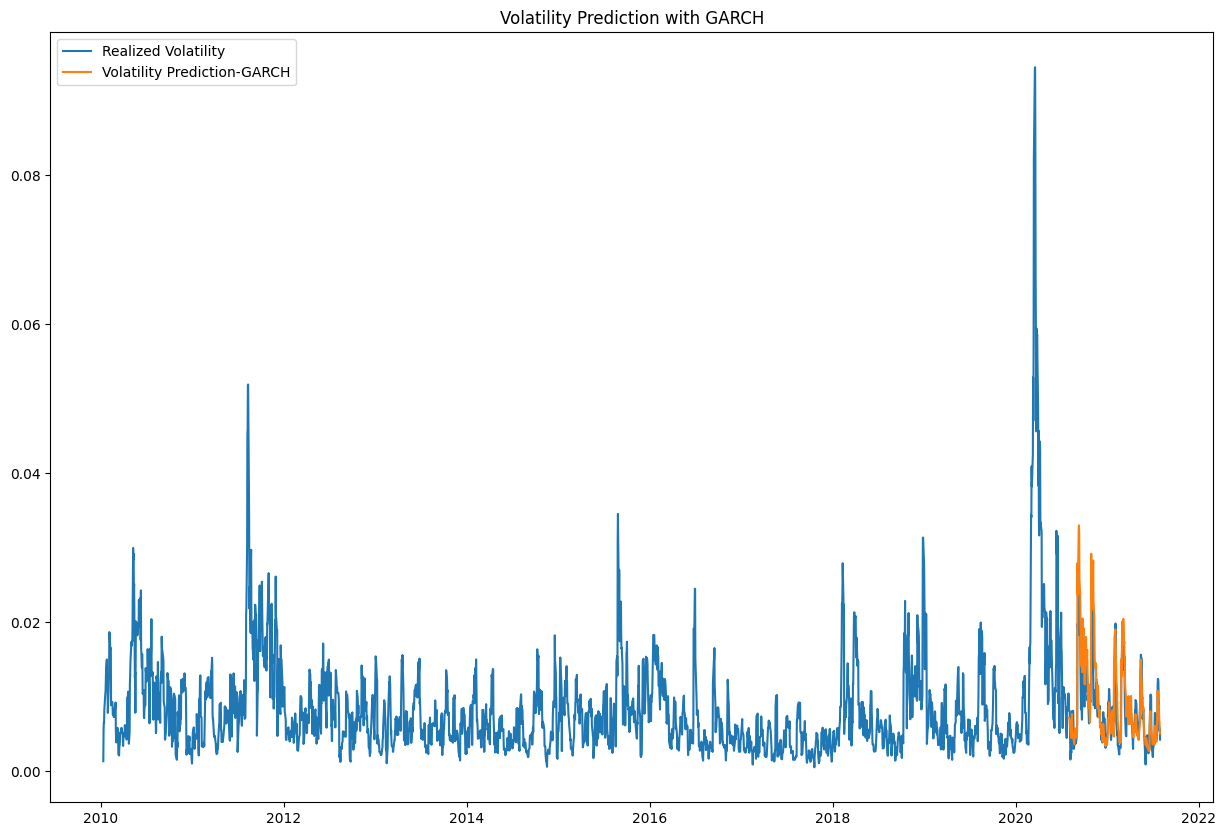

In [38]:
plt.figure(figsize=(15,10))
plt.plot(realized_vol / 100, label='Realized Volatility')
plt.plot(forecast_garch.variance.iloc[-len(split_date):] / 100,
         label='Volatility Prediction-GARCH')
plt.title('Volatility Prediction with GARCH', fontsize=12)
plt.legend()
plt.show()

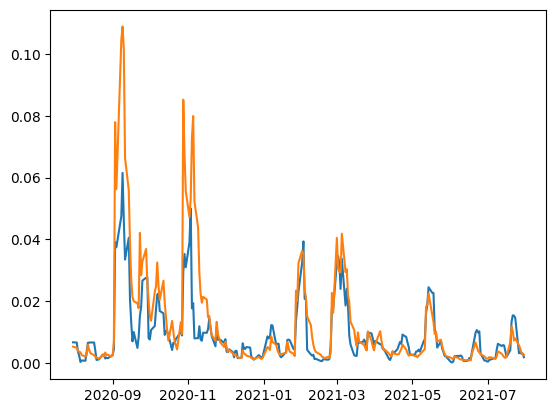

In [37]:
plt.plot(realized_vol[-n:]**2/ 100, label='Realized Volatility')
plt.plot(forecast_garch.variance.iloc[-len(split_date):]**2 / 100,
         label='Volatility Prediction-GARCH')

In [35]:
forecast_garch.variance

,h.1
Date,
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
2010-01-11,NaN
...,...
2021-07-26,0.752618
2021-07-27,0.673411
2021-07-28,0.572677
